<a href="https://colab.research.google.com/github/Confidentrf/DeepLearning/blob/modules/SingalNuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=23467aed8ec0f7d3ca80340f6f73a43b89e06ed1af09c95c2f883b6a7f239fe0
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [9]:
# import required packages from Keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import random


In [17]:
# import required packages for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.patches as mpatches

def plot_decision_boundary(predict_func, X, y):
    # Set the min and max values for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for every point in the grid
    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()
# define a seed for random number generator so the result will be reproducible
seed = 1
np.random.seed(seed)
random.set_seed(seed)

In [13]:
# load the dataset, print the shapes of input and output and the number of examples
feats = pd.read_csv('outlier_feats.csv')
target = pd.read_csv('outlier_target.csv')
print("X size = ", feats.shape)
print("Y size = ", target.shape)
print("Number of examples = ", feats.shape[0])

X size =  (3359, 2)
Y size =  (3359, 1)
Number of examples =  3359


Text(0, 0.5, 'Feature 2')

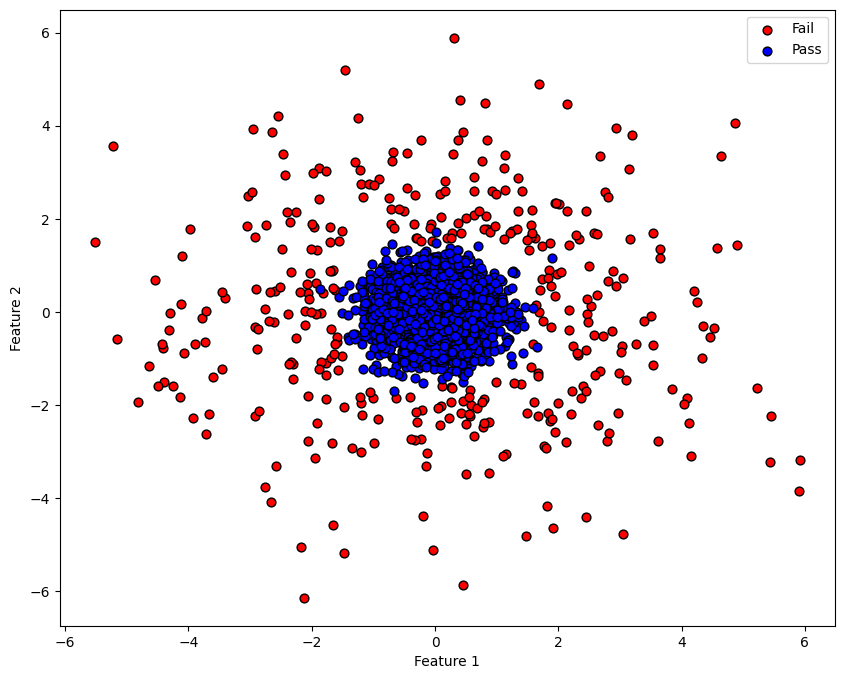

In [14]:
# changing the size of the plots
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

class_1=plt.scatter(feats.loc[target['Class']==0,'feature1'], feats.loc[target['Class']==0,'feature2'], c="red", s=40, edgecolor='k')
class_2=plt.scatter(feats.loc[target['Class']==1,'feature1'], feats.loc[target['Class']==1,'feature2'], c="blue", s=40, edgecolor='k')
plt.legend((class_1, class_2),('Fail','Pass'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [15]:
# Logistic Regression model
np.random.seed(seed)
random.set_seed(seed)
model_1 = Sequential()
model_1.add(Dense(1, activation='sigmoid', input_dim=2))
model_1.compile(optimizer='sgd', loss='binary_crossentropy')

# train the model for 100 epoches and batch size 5
model_1.fit(feats, target, batch_size=5, epochs=100, verbose=1, validation_split=0.2, shuffle=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6161 - val_loss: 0.4278
Epoch 2/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3691 - val_loss: 0.3734
Epoch 3/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3342 - val_loss: 0.3613
Epoch 4/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3266 - val_loss: 0.3575
Epoch 5/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3245 - val_loss: 0.3559
Epoch 6/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3239 - val_loss: 0.3552
Epoch 7/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3237 - val_loss: 0.3548
Epoch 8/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3236 - val_loss: 0.3545
Epoch 9/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3237 - val_loss: 0.3544
Epoch 10/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3237 - val_loss: 0.3543
Epoch 11/100
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3237 - val_loss: 0.3542
Epoch 12/100
538/538 ━━━━━━━━━━━━━━━━━━━━

In [18]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_1.predict(x), feats, target)
plt.title("Logistic Regression")

InvalidIndexError: (slice(None, None, None), 0)

In [19]:
# Neural network with hidden layer size = 3
np.random.seed(seed)
random.set_seed(seed)
model_2 = Sequential()
model_2.add(Dense(3, activation='relu', input_dim=2))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model for 200 epoches and batch size 5
model_2.fit(feats, target, batch_size=5, epochs=200, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5592 - val_loss: 0.4088
Epoch 2/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3664 - val_loss: 0.3396
Epoch 3/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3088 - val_loss: 0.2974
Epoch 4/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2731 - val_loss: 0.2643
Epoch 5/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2454 - val_loss: 0.2383
Epoch 6/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2233 - val_loss: 0.2186
Epoch 7/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2059 - val_loss: 0.2034
Epoch 8/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1922 - val_loss: 0.1910
Epoch 9/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1805 - val_loss: 0.1794
Epoch 10/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1689 - val_loss: 0.1668
Epoch 11/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1560 - val_loss: 0.1515
Epoch 12/200
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

KeyboardInterrupt: 

In [20]:

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_3.predict(x), feats, target)
plt.title("Decision Boundary for Neural Network with hidden layer size 6")

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Neural network with hidden layer size = 3 with tanh activation function
np.random.seed(seed)
random.set_seed(seed)
model_4 = Sequential()
model_4.add(Dense(3, activation='tanh', input_dim=2))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model for 200 epoches and batch size 5
model_4.fit(feats, target, batch_size=5, epochs=200, verbose=1, validation_split=0.2, shuffle=False)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_4.predict(x), feats, target)
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

In [ ]:
np.random.seed(seed)
random.set_seed(seed)
model_5 = Sequential()
model_5.add(Dense(6, activation='tanh', input_dim=2))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model for 400 epoches
model_5.fit(feats, target, batch_size=5, epochs=400, verbose=1, validation_split=0.2, shuffle=False)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model_5.predict(x), feats, target)
plt.title("Decision Boundary for Neural Network with hidden layer size 6")